<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/03_Convolutional_Neural_Networks_%26_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

**Computer vision** is the practice of writing algorithms which can discover patterns in visual data (such as the camera of a self-driving car recognizing the car in front).

## What is a computer vision problem?


Example computer vision problem
* Binary Classification
* Multiclass Classification
* Object Detection


### Computer vision inputs and outputs
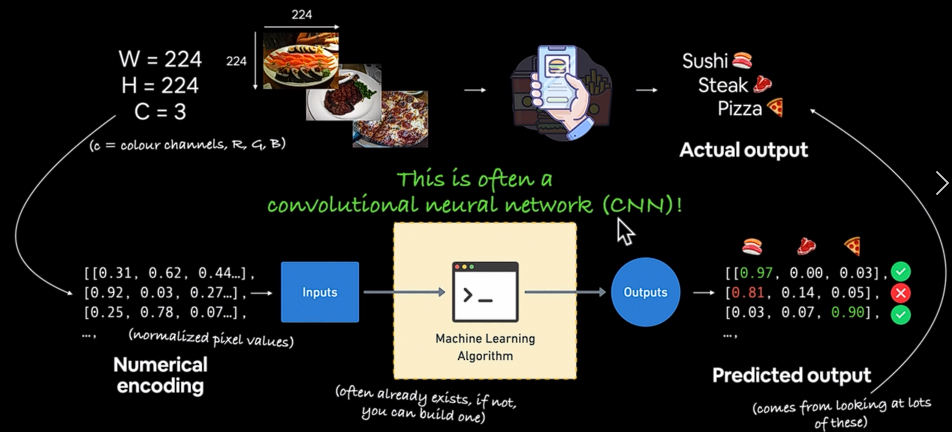


### Input and output shapes

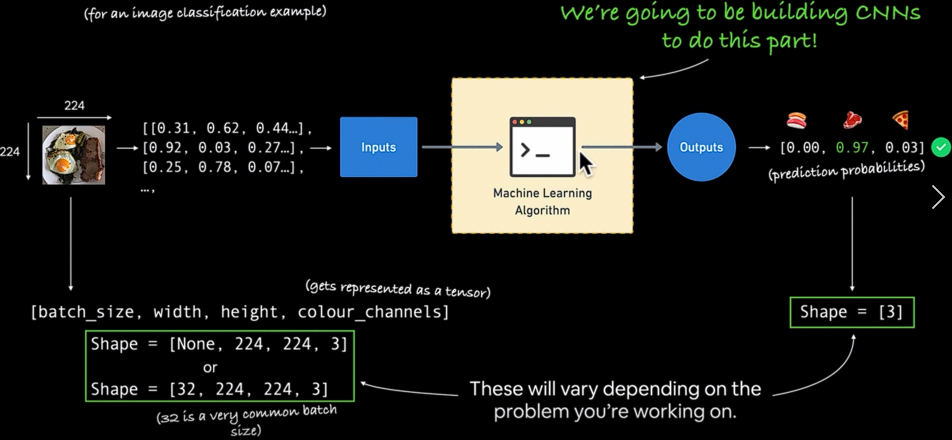


 ### Architecture of a CNN

 **Hyperparameter/Layer type** | **What does it do?** | **Typical values**
 ------------------------------|---------------------|-----------------
 Input image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of
 Input layer | Takes in target images and preprocess them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]`
 Convolution layer | Extracts/learns the most important features from target images | Multiple, can be created with `tf.keras.layers.ConvXD` (X can be multiple values)
 Hidden Activation | Adds non-linearity to learned features | Usually ReLU (`tf.keras.activations.relu`)
 Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`)
 Fully connected layer | Further refines learned features from convolution layers | `tf.keras.layers.Dense`
 Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)
 Output activation | Add non-linearities to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` (multiclass classification)


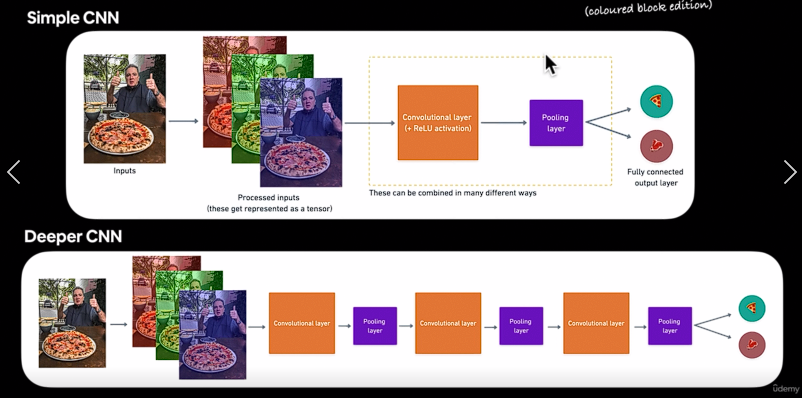

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-09-14 20:09:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.48, 172.253.62.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   204MB/s    in 0.5s    

2022-09-14 20:09:27 (204 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
# Walk through pizza_steak directory and list number of files
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
!ls -la pizza_steak/

total 16
drwxr-xr-x 4 root root 4096 Sep 14 20:09 .
drwxr-xr-x 1 root root 4096 Sep 14 20:09 ..
drwxr-xr-x 4 root root 4096 Sep 14 20:09 test
drwxr-xr-x 4 root root 4096 Sep 14 20:09 train


In [7]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualize the images

In [8]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # Created a list of class_names from the subdirectory in the training folder
print(class_names)

['pizza' 'steak']


In [9]:
# Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")  # show the shape of the image

  return img

Image shape: (512, 512, 3)


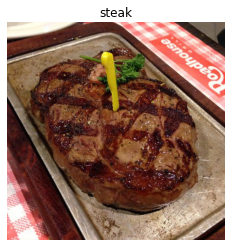

In [10]:
# View a random image from the steak directory
img = view_random_image(target_dir = "pizza_steak/train", target_class="steak")

Image shape: (384, 512, 3)


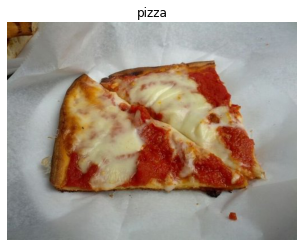

In [11]:
# View a random image from the pizza directory
img = view_random_image(target_dir = "pizza_steak/train", target_class="pizza")

In [12]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[136,  79,  12],
        [131,  74,   7],
        [129,  72,   5],
        ...,
        [139, 151, 149],
        [140, 152, 150],
        [140, 152, 150]],

       [[131,  73,   9],
        [127,  70,   3],
        [125,  68,   1],
        ...,
        [139, 151, 149],
        [139, 151, 149],
        [139, 151, 149]],

       [[128,  73,   8],
        [125,  70,   5],
        [126,  68,   4],
        ...,
        [138, 150, 148],
        [138, 150, 148],
        [138, 150, 148]],

       ...,

       [[101, 107, 105],
        [100, 106, 104],
        [ 98, 104, 102],
        ...,
        [ 94, 100,  96],
        [ 95, 101,  97],
        [ 95, 101,  97]],

       [[ 99, 105, 103],
        [ 99, 105, 103],
        [ 99, 105, 103],
        ...,
        [ 95, 101,  97],
        [ 97, 103,  99],
        [ 97, 103,  99]],

       [[ 99, 105, 103],
        [101, 107, 105],
        [103, 109, 107],
        ...,
        [ 97, 103,  9

In [13]:
# View the image shape
img.shape # return width, height, colour channels

(384, 512, 3)

🔑 **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common *preprocessing* steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by **255** (since 255 is the maximum pixel value).

In [14]:
# Get all the pixel values between 0 & 1 (normalize the values)
img/255.

array([[[0.53333333, 0.30980392, 0.04705882],
        [0.51372549, 0.29019608, 0.02745098],
        [0.50588235, 0.28235294, 0.01960784],
        ...,
        [0.54509804, 0.59215686, 0.58431373],
        [0.54901961, 0.59607843, 0.58823529],
        [0.54901961, 0.59607843, 0.58823529]],

       [[0.51372549, 0.28627451, 0.03529412],
        [0.49803922, 0.2745098 , 0.01176471],
        [0.49019608, 0.26666667, 0.00392157],
        ...,
        [0.54509804, 0.59215686, 0.58431373],
        [0.54509804, 0.59215686, 0.58431373],
        [0.54509804, 0.59215686, 0.58431373]],

       [[0.50196078, 0.28627451, 0.03137255],
        [0.49019608, 0.2745098 , 0.01960784],
        [0.49411765, 0.26666667, 0.01568627],
        ...,
        [0.54117647, 0.58823529, 0.58039216],
        [0.54117647, 0.58823529, 0.58039216],
        [0.54117647, 0.58823529, 0.58039216]],

       ...,

       [[0.39607843, 0.41960784, 0.41176471],
        [0.39215686, 0.41568627, 0.40784314],
        [0.38431373, 0

## An end-to-end example

Build the convolutional neural network to find patterns in our images, we need to:

* Load the images
* Preprocess the images
* Build a CNN to find patterns in our images
* Compile the CNN
* Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Set random seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, 
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the CNN model
history_1 = model_1.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 214ms/step - loss: 0.5636 - accuracy: 0.7100 - val_loss: 0.4269 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4204 - accuracy: 0.8087 - val_loss: 0.3424 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3984 - accuracy: 0.8220 - val_loss: 0.3359 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3697 - accuracy: 0.8407 - val_loss: 0.2979 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3184 - accuracy: 0.8687 - val_loss: 0.3043 - val_accuracy: 0.8780


In [ ]:
model_1.save('/content/drive/MyDrive/Saved_Model/CNN_model_1')

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Trying a non-CNN model on our image data

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 191ms/step - loss: 1.4138 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


## Improving the non-CNN model